# **UGST4085 — Numerical Methods in Calculus and Algebra 2025/26 Fall**  
## Practice Notebook Summary  

## Basics of floating point numbers

<h1><center>Basics of floating point numbers</center></h1>


<b>Problem 1.</b> Enter the values $3.141592653589793$ and $1/3$, then print them. Round these values to the first 4 decimal places using the $\textit{round}$ command.

In [1]:
# define values
m_1 = 3.141592653589793
m_2 = 1/3

# round to 4 decimal places
rounded_1 = round(m_1,4)
rounded_2 = round(m_2,4)

# print
print(rounded_1, rounded_2)

3.1416 0.3333


<b>Problem 2.</b> In the lecture we learned that for floating point numbers, addition and multiplication are not associative operations, and the distributive property does not hold either. Let us verify the former in the case of addition, when

$$a = 0.4,\ b = − 0.5\ \text{and}\ c = 0.1.$$

Formally, let us also check the validity of the statement using a logical operator!

In [2]:
# define a, b, c
a, b, c = 0.4, -0.5, 0.1

# check associativity
print((a+b)+c == a + (b+c))

False


<b>Poblem 3.</b> Let us examine the values of the machine epsilon, the smallest positive normalized floating point number, and the largest finitely representable floating point number.

In [3]:
# modules
import numpy as np

# eps
print(np.finfo(float).eps)

# \varesp_0
print(np.finfo(float).tiny)
#print(sys.float_info.min)

# M_infty
print(np.finfo(float).max)
# print(sys.float_info.max)

2.220446049250313e-16
2.2250738585072014e-308
1.7976931348623157e+308


<b>Problem 4.</b> Consider the following two algorithms for computing sums of the form $a_1+a_2+\cdots+a_n$:
<body>
    <pre>
        <code>
             Algorithm #1            Algorithm #2
            s = 0;                   s = 0;
            for i = 1:n              for i = n:-1:1
                s = s + a_i;             s = s + a_i;
            end                      end
        </code> 
    </pre>
</body>

What do the two algorithms do? In light of what we have learned so far, what do we expect before running them? Write a script that calculates

$$
S_n=\sum_{i=1}^n\frac{1}{i(i+1)}
$$

using both algorithms for $n=10^6-1=999999$. Explain the observed phenomena!

In [4]:
# initialize sum
s = 0

# for each element of series
for i in range(1,1000000):
    
    # define element and add to sum
    s = s + 1 / (i*(i+1))

#  print result
print(s)


# initialize sum
s = 0

# for each element of series in reverse order
for i in range(1000000,0,-1):
    
    # define element and add to sum
    s = s + 1 / (i*(i+1))
    
#  print result
print(s)

0.9999990000000476
0.999999000001


<b>Problem 5.</b> Let us consider the definite integral
$$I_n = \int_0^1 \frac{x^n}{10+x} dx,$$
where $n \in \mathbb{N}$. One can prove that

+ $I_n \geq 0,\ I_{n+1} \leq I_n$ and $I_n  \rightarrow 0$ if $n  \rightarrow 0$
+ $I_n = \frac{1}{n} - 10 I_{n-1}$

Write a program that computes the values of the above recursion steps up to a given $n$, starting from the initial value $I_0 = \ln(1.1)$. What do we observe for large values of $n$? 

In [5]:
# modules
import numpy as np

# direct recursion
def recursion(n):
    
    # initialize array of zeros
    I = np.zeros(n+1)
    
    # initial value
    I[0] = np.log(1.1)
    
    # recursion
    for i in range(n):
        
        # formula
        I[i+1] = 1 / (i+1) - 10 * I[i]
        
    return I


# stable recursion
def stable_recursion(n):
    
    # initialize array of zeros
    I = np.zeros(n+1)
    
    # final value
    I[n] = 0
    
    # recursion reverse
    for i in range(n-1,-1,-1):
        
        # formula
        I[i] = 1 / 10 * (1/(i+1) - I[i+1])
        
    return I

# test
n = 20

# calc and print
print(recursion(n))
print(stable_recursion(n))

[ 9.53101798e-02  4.68982020e-02  3.10179804e-02  2.31535290e-02
  1.84647099e-02  1.53529008e-02  1.31376583e-02  1.14805602e-02
  1.01943982e-02  9.16712861e-03  8.32871387e-03  7.62195226e-03
  7.11381077e-03  5.78496925e-03  1.35788790e-02 -6.91221231e-02
  7.53721231e-01 -7.47838878e+00  7.48394434e+01 -7.48341802e+02
  7.48346802e+03]
[0.09531018 0.0468982  0.03101798 0.02315353 0.01846471 0.0153529
 0.01313766 0.01148056 0.01019439 0.0091672  0.00832797 0.00762944
 0.00703898 0.00653332 0.00609541 0.00571256 0.00537443 0.00507924
 0.00476316 0.005      0.        ]


<b>Problem 6.</b> Write a script that plots the value of the expression in the neighborhood of $(x-1)^8$ using the following functions:

+ $f(x)=(x-1)^8$
+ $g(x) =x^8-8x^7+28x^6-56x^5+70x^4-56x^3+28x^2-8x+1$

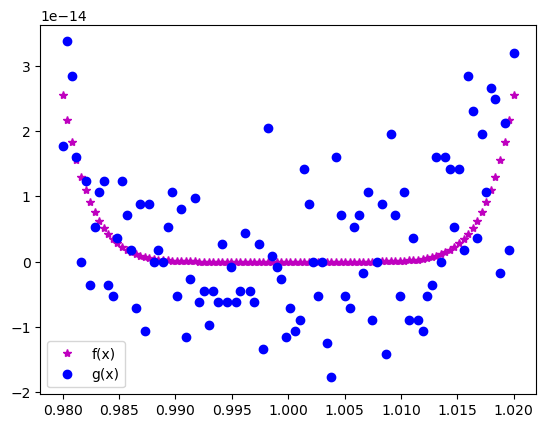

In [6]:
# modules
import numpy as np
import matplotlib.pyplot as plt

# define x, f(x) and g(x)
x = np.linspace(0.98, 1.02, 100)
f = (x - 1) ** 8
g = x ** 8 - 8* x ** 7 + 28 * x ** 6 - 56 * x ** 5 + 70 * x ** 4 - 56 * x ** 3 + 28 * x **2 - 8 * x + 1

# plot
plt.plot(x,f, 'm*', label = 'f(x)')
plt.plot(x,g,'bo', label = 'g(x)')
plt.legend()
plt.show()

## Finite Difference Schemes

<h1><center>Finite difference schemes</center></h1>

<b>Problem 1.</b>  Let us consider the function $f(x)=\sin\left(e^{x+1}\right),\ x\in [-1,1]$ and the learned finite difference schemes $\Delta f_+$ and $\Delta f_c$. Write a Python script which applies these schemes to the function $f$ with step-size values $h=10^{-i},\ i=1,\ldots,5$ in order to approximate the value $f'(0)$. Compute the error measure in absolute value for the different $h$ values. Create a plot which demonstrates the expected convergence order of the finite difference schemes $\Delta f_+$ and $\Delta f_c$.

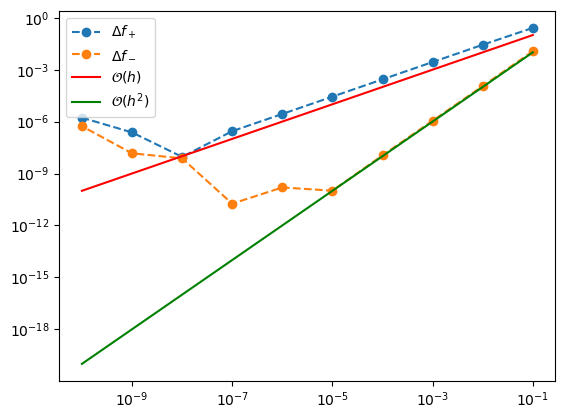

In [7]:
# modules
import math
import numpy as np
import matplotlib.pyplot as plt

# define f(x)
def f(x):
    if -1<x<1 == True:
        return np.sin(np.exp(x+1))

# exact value of f'(0)
exact_value = np.cos(np.exp(1))*np.exp(1)

# h values
h_values = [1/10**n for n in range(1,11)]

# initialize lists
FD1 = []
FD2 = []

# for each h
for h in h_values:
    
    # forward difference
    FD1.append((f(h)-f(0))/h)
    
    # central difference
    FD2.append((f(h)-f(-h)) / (2*h))


# calculate errors
error_FD1 = [abs(exact_value-fd1) for fd1 in FD1]
error_FD2 = [abs(exact_value - fd2) for fd2 in FD2]

# plot errors
plt.loglog(h_values, 
           error_FD1, 
           '--', 
           marker='o',
           label='$\Delta f_+$')

# central difference
plt.loglog(h_values, 
           error_FD2, 
           '--', 
           marker='o',
           label='$\Delta f_-$')

# reference lines
plt.loglog(h_values, 
           [h for h in h_values], 
           color ='red',
           label='$\mathcal{O}(h)$')

# second order reference line
plt.loglog(h_values, 
           [h**2 for h in h_values], 
           color ='green',
           label='$\mathcal{O}(h^2)$')

# plot
plt.legend()
plt.show()

## Interpolation

<h1><center>Interpolation</center></h1>



<b>Problem 1. </b>  Write a Python script that, given a set of point pairs, outputs the Lagrange interpolation polynomial and also plots it together with the data.

        3      2
-1.333 x + 10 x - 21.67 x + 15


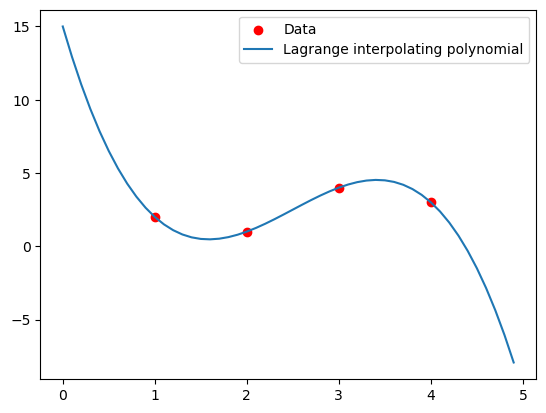

 
1 x + 1


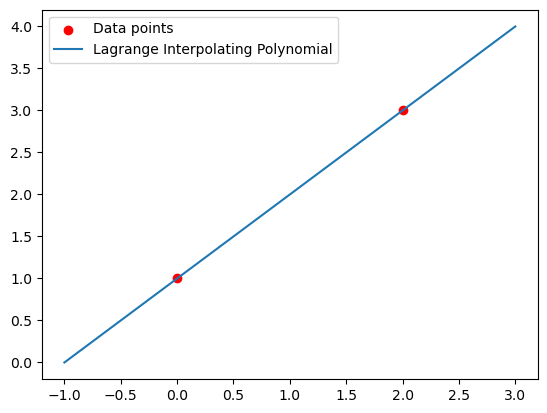

In [8]:
# modules
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# basic data
x = np.array([1, 2, 3, 4])
f_x = np.array([2, 1, 4, 3])
Lagrange_polynomial = lagrange(x, f_x)
print(Lagrange_polynomial)

# plot
x_fine = np.arange(0,5,0.1)
plt.scatter(x,f_x,c='r',label='Data')
plt.plot(x_fine,Polynomial(Lagrange_polynomial.coef[::-1])(x_fine),label='Lagrange interpolating polynomial')
plt.legend()
plt.show()

# data points
x = np.array([0,2])
y = np.array([1,3])
poly = lagrange(x, y) # lagrange interpolating polynomial
print(poly)

# plot L_n(x) together with the data points
plt.scatter(x, y, color='red', label='Data points')
x_fine = np.linspace(-1, 3, 100)
plt.plot(x_fine, poly(x_fine), label='Lagrange Interpolating Polynomial')
plt.legend()
plt.show()

## Numerical Integration

<h1><center>Numerical Integration</center></h1>



<b>Problem 1. </b>  Write a Python script that calculates the values of the trapezoidal rule, Simpson's formula, and the midpoint method. Apply it to $f(x)=x^2−2x+1$ on the interval $[1, 3]$.

In [9]:
# define f, a, b
f = lambda x: x**2 - 2* x +2
a, b = 1, 3

# midpoint rule
def midpoint(f, a, b):
    return (b-a) * f((a+b)/2)

# trapezoidal rule
def trapezoidal(f, a, b):
    return (b-a) * (f(a) + f(b)) / 2

# simpsons rule
def simpsons(f, a, b):
    return (b-a) * (f(a) + 4*f((a+b)/2) + f(b)) / 6

# print results
print(midpoint(f, a, b))
print(trapezoidal(f, a, b))
print(simpsons(f, a, b))

4.0
6.0
4.666666666666667


<b>Problem 2. </b>  Write a Python script that calculates the values of the composite versions of the trapezoidal rule, Simpson's formula, and the midpoint method. Apply it to $f(x)=x^2−2x+1$ on the interval $[1, 3]$ with 10 subintervals.

In [10]:
# modules
import numpy as np

# define f, a, b
f = lambda x: x**2 - 2* x +2
a, b = 1, 3

# composite midpoint rule
def composite_midpoint(f, a, b, n):
    
    # subintervals
    h = (b - a) / n
    
    # initialize total
    total = 0
    
    # sum function values at midpoints
    for i in range(n):
        total += f(a + (i + 0.5) * h)
        
    return h * total

# vectorized midpoint rule
def composite_midpoint_vectorized(f, a, b, n):
    
    # step size
    h = (b - a) / n
    
    # midpoints
    x = a + (np.arange(n) + 0.5) * h
    
    return h * np.sum(f(x))

# composite trapezoidal rule
def composite_trapezoidal(f, a, b, n):
    
    # step size
    h = (b - a) / n
    
    # initialize total
    total = 0.5 * (f(a) + f(b))
    
    # sum function values at interior points
    for i in range(1, n):
        total += f(a + i * h)
    
    return h * total

# vectorized composite trapezoidal rule
def composite_trapezoidal_vectorized(f, a, b, n):
    
    # step size
    h = (b - a) / n
    
    # interior points
    x = a + np.arange(1, n) * h
    
    return h * (0.5 * (f(a) + f(b)) + np.sum(f(x)))

# composite simpsons rule
def composite_simpsons(f, a, b, n):
    
    # require even number of intervals
    if n % 2 == 1:
        n += 1  # Simpson's rule requires an even number of intervals
        
    # step size
    h = (b - a) / n
    
    # initialize total
    total = f(a) + f(b)
    
    # sum function values at odd indices
    for i in range(1, n, 2):
        total += 4 * f(a + i * h)
    
    # sum function values at even indices
    for i in range(2, n-1, 2):
        total += 2 * f(a + i * h)
        
    return h * total / 3

# vectorized composite simpsons rule
def composite_simpsons_vectorized(f, a, b, n):
    
    # require even number of intervals
    if n % 2 == 1:
        n += 1  # Simpson's rule requires an even number of intervals
        
    # step size
    h = (b - a) / n
    
    # odd and even indices
    x_odd = a + (np.arange(1, n, 2)) * h
    x_even = a + (np.arange(2, n-1, 2)) * h
    
    return h * (f(a) + f(b) + 4 * np.sum(f(x_odd)) + 2 * np.sum(f(x_even))) / 3

# define n
n = 4

# print results
print(composite_midpoint(f, a, b, n))
print(composite_trapezoidal(f, a, b, n))
print(composite_simpsons(f, a, b, n))
print(composite_midpoint_vectorized(f, a, b, n))
print(composite_trapezoidal_vectorized(f, a, b, n))
print(composite_simpsons_vectorized(f, a, b, n))

4.625
4.75
4.666666666666667
4.625
4.75
4.666666666666667


In [11]:
# tolerance problems (calc in python)
import math

# define values
a = 0
b = math.pi/4
M_2 = 2 # max of second derivative
TOL = 10 ** (-4)

# calc n and print
n = math.sqrt(((b - a) ** 3 * M_2) / (12 * TOL))
print(math.ceil(n))

29


## Direct and iterative methods for solving linear systems

<h1><center>Direct and iterative methods for solving linear systems</center></h1>




<b>Problem 1.</b> Write a program that measures how quickly the equation $Ax=b$ is solved for $N=2^i,\ i=1,\ldots,12$, where $A=randn(N)$ and $b=(1,\ldots,1)^T\in\mathbb{R}^N$. Plot the measured results.

N: 2, Time:0.000000 seconds
N: 4, Time:0.000000 seconds
N: 8, Time:0.000000 seconds
N: 16, Time:0.000000 seconds
N: 32, Time:0.000000 seconds
N: 64, Time:0.000000 seconds
N: 128, Time:0.000000 seconds
N: 256, Time:0.000000 seconds
N: 512, Time:0.000000 seconds
N: 1024, Time:0.063786 seconds
N: 2048, Time:0.406821 seconds
N: 4096, Time:4.123683 seconds
N: 8192, Time:33.947342 seconds


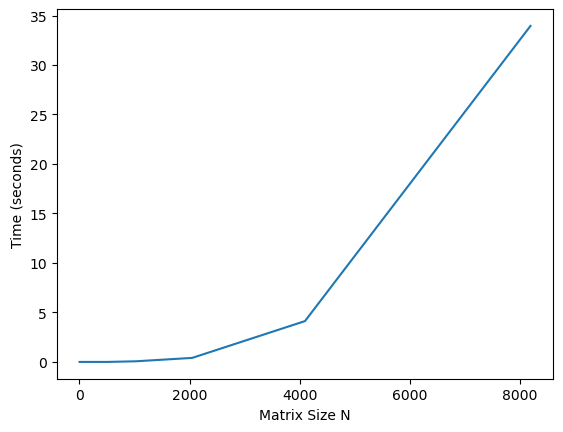

In [12]:
# modules
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

# initialize lists
dimensions = []
time_list = []

# for each matrix size
for i in range(1, 14):
    
    # generate random matrix and vector
    N = 2**i
    A = np.random.randn(N, N)
    b = np.ones(N)

    # start measurement
    start_time = time.time()
    
    # solve system
    np.linalg.solve(A, b)
    
    # end measurement
    end_time = time.time()
    
    # calculate and print elapsed time
    elapsed_time = end_time - start_time
    print(f"N: {N}, Time:{elapsed_time:.6f} seconds")
    
    # save to list
    dimensions.append(N)
    time_list.append(elapsed_time)

# plot results
plt.plot(dimensions, time_list)
plt.xlabel('Matrix Size N')
plt.ylabel('Time (seconds)')
plt.show()

<b>Problem 2.</b> Create a log–log plot and interpret the results we obtained earlier.

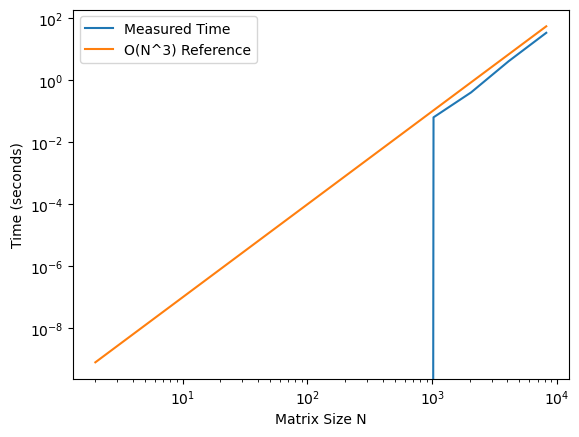

In [13]:
# modules
import numpy as np
import matplotlib.pyplot as plt

# plot results
plt.loglog(dimensions, time_list)
plt.loglog(dimensions, 1e-10 * np.power(dimensions, 3))
plt.xlabel('Matrix Size N')
plt.ylabel('Time (seconds)')
plt.legend(['Measured Time', 'O(N^3) Reference'])
plt.show()

<b>Problem 3.</b> Write a program that solves the equation $Ax=b$ using the Jacobi iteration. Use as the first stopping criterion the relative error of the numerical solution vector measured in the maximum norm, with a given tolerance. As the second stopping criterion, use a maximum number of iterations.

In [14]:
# modules
import numpy as np

# Jacobi Decomposition Method
def jacobi_decomposition(A, # matrix A
                         b, # vector b
                         x0, # initial guess
                         tol=1e-10, # tolerance
                         toltyp='abs', # tolerance type ('abs' or 'rel', or 'residual')
                         max_iterations=1000 # max iterations
                         ):
    
    # initialize variables
    relerr = np.inf
    it = 1
    X = np.zeros((len(x0), max_iterations+1))
    X[:, 0] = x0
    
    # decompose A into D, L, U
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    
    # stopping criteria
    while relerr > tol and it <= max_iterations:
        
        # update solution
        X[:, it] = np.linalg.solve(D, b - (L + U) @ X[:, it - 1])
        
        # calculate abs error
        if toltyp == 'abs':
            relerr = np.linalg.norm(X[:, it] - X[:, it - 1], ord=np.inf)
            
        # calculate rel error
        if toltyp == 'rel':
            relerr = np.linalg.norm(X[:, it] - X[:, it - 1], ord=np.inf) / np.linalg.norm(X[:, it], ord=np.inf)
            
        # calculate residual error
        if toltyp == 'residual':
            relerr = np.linalg.norm(A @ X[:, it] - b, ord=np.inf)
            
        # increment iteration counter
        it += 1

    return X[:, it - 1], it - 1

# test
A = np.array([[2,-1,0], [-1,2,-1], [0,-1,2]], dtype=float)
b = np.array([1,2,3], dtype=float)
x0 = np.array([1,1,1], dtype=float)

# apply
x, iterations = jacobi_decomposition(A, b, x0, max_iterations=200)

# print results
print("Solution:", x)
print("Iterations:", iterations)

Solution: [2.5 4.  3.5]
Iterations: 68


<b>Problem 4.</b> Write a program that solves the equation $Ax=b$ using the Gauss-Seidel iteration. Use as the first stopping criterion the relative error of the numerical solution vector measured in the maximum norm, with a given tolerance. As the second stopping criterion, use a maximum number of iterations.

In [15]:
# modules
import numpy as np

# Gauss-Seidel Decomposition Method
def gs_decomposition(A, # matrix A
                     b, # vector b
                     x0, # initial guess
                     tol=1e-10, # tolerance
                     toltyp='abs', # tolerance type ('abs' or 'rel' or 'residual')
                     max_iterations=1000 # max iterations
                     ):
    
    # initialize variables
    relerr = np.inf
    it = 1
    X = np.zeros((len(x0), max_iterations+1))
    X[:, 0] = x0
    
    # decompose A into D, L, U
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    
    # stopping criteria
    while relerr > tol and it <= max_iterations:
        
        # update solution
        X[:, it] = np.linalg.solve(L+D, b - U @ X[:, it - 1])
        
        # calculate abs error
        if toltyp == 'abs':
            relerr = np.linalg.norm(X[:, it] - X[:, it - 1], ord=np.inf)
            
        # calculate rel error
        if toltyp == 'rel':
            relerr = np.linalg.norm(X[:, it] - X[:, it - 1], ord=np.inf) / np.linalg.norm(X[:, it], ord=np.inf)
            
        # calculate residual error
        if toltyp == 'residual':
            relerr = np.linalg.norm(A @ X[:, it] - b, ord=np.inf)
            
        # increment iteration counter
        it += 1

    return X[:, it - 1], it - 1

# test
A = np.array([[2,-1,0], [-1,2,-1], [0,-1,2]], dtype=float)
b = np.array([1,2,3], dtype=float)
x0 = np.array([1,1,1], dtype=float)

# apply
x, iterations = gs_decomposition(A, b, x0, max_iterations=200)

# print results
print("Solution:", x)
print("Iterations:", iterations)

Solution: [2.5 4.  3.5]
Iterations: 36


<b>Problem 5.</b> Write a program that solves the equation $Ax=b$ using the SOR iteration. Use as the first stopping criterion the relative error of the numerical solution vector measured in the maximum norm, with a given tolerance. As the second stopping criterion, use a maximum number of iterations.

In [16]:
# sor decomposition
def sor_decomposition(A, # matrix A
                      b, # vector b
                      x0, # initial guess
                      omega=1.25, # relaxation parameter
                      tol=1e-10, # tolerance
                      toltyp='rel', # tolerance type ('abs' or 'rel' or 'residual')
                      max_iterations=1000 # max iterations
                      ):
    
    # initialize variables
    n = len(x0)
    X = np.zeros((n, max_iterations+1))
    X[:, 0] = x0
    it = 1
    relerr = np.inf

    # stopping criteria
    while relerr > tol and it <= max_iterations:
        
        # update solution
        x_old = X[:, it-1].copy()
        
        # initialize new solution
        x_new = x_old.copy()

        # SOR iteration
        for i in range(n):
            
            # compute the weighted sum of the known terms
            sigma = A[i, :i] @ x_new[:i] + A[i, i+1:] @ x_old[i+1:]
            
            # update the ith component of the solution
            x_new[i] = (1 - omega) * x_old[i] + (omega / A[i, i]) * (b[i] - sigma)

        # update solution matrix
        X[:, it] = x_new
        
        # abs error
        if toltyp == 'abs':
            relerr = np.linalg.norm(x_new - x_old, ord=np.inf)
            
        # rel error
        if toltyp == 'rel':
            relerr = np.linalg.norm(x_new - x_old, ord=np.inf) / np.linalg.norm(x_new, ord=np.inf)
            
        # residual error
        if toltyp == 'residual':
            relerr = np.linalg.norm(A @ x_new - b, ord=np.inf)
            
        # increment iteration counter
        it += 1

    return X[:, it-1], it-1

# test
A = np.array([[2,-1,0], [-1,2,-1], [0,-1,2]], dtype=float)
b = np.array([1,2,3], dtype=float)
x0 = np.array([1,1,1], dtype=float)

# apply
x, iterations = sor_decomposition(A, b, x0, omega=1.25, max_iterations=200)

# print results
print("Solution:", x)
print("Iterations:", iterations)

Solution: [2.5 4.  3.5]
Iterations: 19


## Bisection method and fixed point iteration

<h1><center>Bisection method and fixed point iteration</center></h1>

<b>Problem 1.</b> Implement the bisection method with maximum number of iterations stopping criterion. Apply the code to problem $x^3 - 4x^2 + 6x - 24=0,\ x\in[3,6]$. What is the center of the subinterval during the 7th iteration?

In [17]:
# bisection method
def bisection(f, a, b, tol=1e-10, toltyp='rel', max_iterations=100):
    
    # check that f(a) and f(b) have opposite signs
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    # initial error
    relerr = np.inf

    # iterations
    for k in range(max_iterations):

        # compute midpoint
        c = (a + b) / 2

        # stopping (exact root)
        if f(c) == 0:
            return c

        # compute relative error
        if toltyp == 'rel':
            relerr = abs(b - a) / max(abs(c), 1e-15)

        # compute absolute error
        if toltyp == 'abs':
            relerr = abs(b - a)

        # stopping by error
        if relerr < tol:
            return c

        # update interval
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

    # return best midpoint
    return (a + b) / 2

<b>Problem 2.</b> Implement the fixed point iteration with maximum number of iterations stopping criterion. Apply the code to problem $x=\sqrt{x+2}$, $x\in[0,2]$ with initial value $x_0=0$. What is the approximated root after 10 iterations?

In [18]:
# modules
import math

# fixed point iteration
def fixed_point_iter(F,x0, max_iterations):
    
    # iterations
    for k in range(max_iterations):
        
        # update estimate
        x = F(x0)
        x0 = x
        
    return x

# test function
def F(x):
    return math.sqrt(x+2) # has to be proved
x0 = 0
n = 10

print(2 - fixed_point_iter(F, x0, n))

2.3530965962414996e-06


## Newton's Method

<h1><center>Newton's method</center></h1>





<b>Problem 1.</b> We implement the Newton method with absolute error and maximum iteration stopping criteria. Apply this to the following problems:

+ $x^2-x-6=0,\ x\in[1,4]$
+ $x^2-2=0,\ x\in[1,2]$
+ $x=\cos(x),\ x\in[0,1]$ <br>

In [19]:
# modules
import numpy as np

# Newton's method for scalar functions
def scalar_newton(f, f_prime, a, b, x0, max_iter=100, tol=1e-10, toltyp='abs'):
    
    # initial guess
    x_n = x0

    # iterations
    for n in range(max_iter):

        # function + derivative at current iterate
        f_xn = f(x_n)
        f_prime_xn = f_prime(x_n)

        # compute error (abs or relative)
        if toltyp == 'rel':
            err = abs(f_xn) / max(abs(x_n), 1e-15)
        if toltyp == 'abs':
            err = abs(f_xn)
            
        # stopping
        if err < tol:
            return x_n

        # derivative check
        if f_prime_xn == 0:
            raise ValueError("Derivative is zero. No solution found.")

        # Newton update
        x_n = x_n - f_xn / f_prime_xn

        # interval check
        if x_n < a or x_n > b:
            raise ValueError("Newton's method went out of bounds.")

    # if no convergence
    raise ValueError("Maximum iterations reached. No solution found.")

# tests
def f(x):
    return x**2 - x - 6
def f_prime(x):
    return 2*x - 1
print(scalar_newton(f, f_prime, 1, 4, 3))
def g(x):
    return x**2 - 2
def g_prime(x):
    return 2*x
print(scalar_newton(g, g_prime, 1, 2, 3))
def h(x):
    return np.cos(x) - x
def h_prime(x):
    return -np.sin(x) - 1
print(scalar_newton(h, h_prime, 0, 1, 0.5))

3
1.4142135623731118
0.7390851332151607


<b>Problem 2.</b> Implement the system version of Newton's method with maximum oteration stopping criterion. Apply the code to the system

\begin{align}
e^x + y^2 &= 6 − xy\\ 
xy^2 + 1 &= 6x.
\end{align}
 
with initial conditions $x_0 = 0$ and $y_0 = 1$.

In [20]:
# modules
import numpy as np

# system Newton's method
def system_newton(F, J, x0, max_iter=100, tol=1e-10, toltyp='abs'):

    # initial guess
    x_n = np.array(x0, dtype=float)

    for n in range(max_iter):

        # function and Jacobian at current iterate
        F_xn = F(x_n)
        J_xn = J(x_n)

        # compute error (abs or rel)
        if toltyp == 'rel':
            err = np.linalg.norm(F_xn, ord=2) / max(np.linalg.norm(x_n, ord=2), 1e-15)
        else:
            err = np.linalg.norm(F_xn, ord=2)

        # stopping
        if err < tol:
            return x_n

        # explicit inverse step: delta = -J^{-1} F
        try:
            J_inv = np.linalg.inv(J_xn)       # Jacobian inverse
            delta = - J_inv @ F_xn            # Newton step
        except np.linalg.LinAlgError:
            raise ValueError("Jacobian is singular. No solution found.")

        # update
        x_n = x_n + delta

    # no convergence
    raise ValueError("Maximum iterations reached. No solution found.")

# test functions
def F1(x):
    return np.array([np.exp(x[0]) + x[1]**2 + x[0] * x[1] - 6,
                     x[0] * x[1] ** 2 - 6 * x[0] + 1])
def J1(x):
    return np.array([[np.exp(x[0]) + x[1], 2*x[1] + x[0]],
                     [x[1] ** 2 - 6, 2*x[0] * x[1]]])
x0 = [0, 1]

# apply and print
print(system_newton(F1, J1, x0))

[-0.70346266  2.72425028]
